In [1]:
# Load the dataset
letters <- read.csv("letterdata.csv", stringsAsFactors = TRUE)

# Display the structure of the dataset
str(letters)

'data.frame':	20000 obs. of  17 variables:
 $ letter: Factor w/ 26 levels "A","B","C","D",..: 20 9 4 14 7 19 2 1 10 13 ...
 $ xbox  : int  2 5 4 7 2 4 4 1 2 11 ...
 $ ybox  : int  8 12 11 11 1 11 2 1 2 15 ...
 $ width : int  3 3 6 6 3 5 5 3 4 13 ...
 $ height: int  5 7 8 6 1 8 4 2 4 9 ...
 $ onpix : int  1 2 6 3 1 3 4 1 2 7 ...
 $ xbar  : int  8 10 10 5 8 8 8 8 10 13 ...
 $ ybar  : int  13 5 6 9 6 8 7 2 6 2 ...
 $ x2bar : int  0 5 2 4 6 6 6 2 2 6 ...
 $ y2bar : int  6 4 6 6 6 9 6 2 6 2 ...
 $ xybar : int  6 13 10 4 6 5 7 8 12 12 ...
 $ x2ybar: int  10 3 3 4 5 6 6 2 4 1 ...
 $ xy2bar: int  8 9 7 10 9 6 6 8 8 9 ...
 $ xedge : int  0 2 3 6 1 0 2 1 1 8 ...
 $ xedgey: int  8 8 7 10 7 8 8 6 6 1 ...
 $ yedge : int  0 4 3 2 5 9 7 2 1 1 ...
 $ yedgex: int  8 10 9 8 10 7 10 7 7 8 ...


In [2]:
summary(letters)

     letter           xbox             ybox            width       
 U      :  813   Min.   : 0.000   Min.   : 0.000   Min.   : 0.000  
 D      :  805   1st Qu.: 3.000   1st Qu.: 5.000   1st Qu.: 4.000  
 P      :  803   Median : 4.000   Median : 7.000   Median : 5.000  
 T      :  796   Mean   : 4.024   Mean   : 7.035   Mean   : 5.122  
 M      :  792   3rd Qu.: 5.000   3rd Qu.: 9.000   3rd Qu.: 6.000  
 A      :  789   Max.   :15.000   Max.   :15.000   Max.   :15.000  
 (Other):15202                                                     
     height           onpix             xbar             ybar     
 Min.   : 0.000   Min.   : 0.000   Min.   : 0.000   Min.   : 0.0  
 1st Qu.: 4.000   1st Qu.: 2.000   1st Qu.: 6.000   1st Qu.: 6.0  
 Median : 6.000   Median : 3.000   Median : 7.000   Median : 7.0  
 Mean   : 5.372   Mean   : 3.506   Mean   : 6.898   Mean   : 7.5  
 3rd Qu.: 7.000   3rd Qu.: 5.000   3rd Qu.: 8.000   3rd Qu.: 9.0  
 Max.   :15.000   Max.   :15.000   Max.   :15.000   Ma

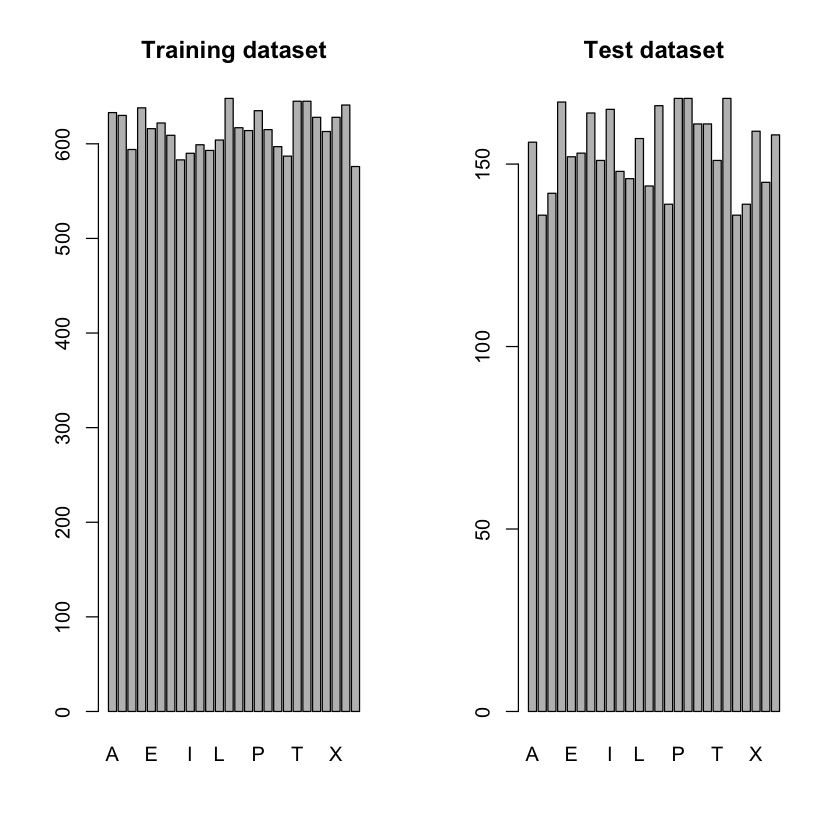

In [3]:
# Create the training and test datasets
letters_train <- letters[1:16000, ]
letters_test <- letters[16001:20000, ]

# Quick visual check of representativeness
par(mfrow = c(1,2))
plot(letters_train$letter, main = "Training dataset")
plot(letters_test$letter, main = "Test dataset")

In [4]:
# install.packages("kernlab")
library(kernlab)

# Train the model on the training dataset
letter_classifier <- ksvm(letter ~ ., data = letters_train, kernel = "vanilladot")

# Display basic information
letter_classifier

 Setting default kernel parameters  


Support Vector Machine object of class "ksvm" 

SV type: C-svc  (classification) 
 parameter : cost C = 1 

Linear (vanilla) kernel function. 

Number of Support Vectors : 7037 

Objective Function Value : -14.1746 -20.0072 -23.5628 -6.2009 -7.5524 -32.7694 -49.9786 -18.1824 -62.1111 -32.7284 -16.2209 -32.2837 -28.9777 -51.2195 -13.276 -35.6217 -30.8612 -16.5256 -14.6811 -32.7475 -30.3219 -7.7956 -11.8138 -32.3463 -13.1262 -9.2692 -153.1654 -52.9678 -76.7744 -119.2067 -165.4437 -54.6237 -41.9809 -67.2688 -25.1959 -27.6371 -26.4102 -35.5583 -41.2597 -122.164 -187.9178 -222.0856 -21.4765 -10.3752 -56.3684 -12.2277 -49.4899 -9.3372 -19.2092 -11.1776 -100.2186 -29.1397 -238.0516 -77.1985 -8.3339 -4.5308 -139.8534 -80.8854 -20.3642 -13.0245 -82.5151 -14.5032 -26.7509 -18.5713 -23.9511 -27.3034 -53.2731 -11.4773 -5.12 -13.9504 -4.4982 -3.5755 -8.4914 -40.9716 -49.8182 -190.0269 -43.8594 -44.8667 -45.2596 -13.5561 -17.7664 -87.4105 -107.1056 -37.0245 -30.7133 -112.3218 -32.9619 -27.2971 -35.5

In [5]:
# Generate predictions for the test dataset
letter_predictions <- predict(letter_classifier, letters_test)

# Inspect the output
str(letter_predictions)

# Display the first 10 predictions
head(letter_predictions, 10)

# Display the first 10 true values
head(letters_test$letter, 10)

 Factor w/ 26 levels "A","B","C","D",..: 21 14 22 24 14 8 5 25 7 5 ...


[1] U N V X N H E Y G E
Levels: A B C D E F G H I J K L M N O P Q R S T U V W X Y Z

[1] U N V I N H E Y G E
Levels: A B C D E F G H I J K L M N O P Q R S T U V W X Y Z

In [6]:
# Frequencies and proportions of agreement/disagreement
table(letter_predictions == letters_test$letter)
round(proportions(table(letter_predictions == letters_test$letter)) * 100, 1)


FALSE  TRUE 
  643  3357 


FALSE  TRUE 
 16.1  83.9 

In [7]:
# Generate a confusion matrix
table(letters_test$letter, letter_predictions)

   letter_predictions
      A   B   C   D   E   F   G   H   I   J   K   L   M   N   O   P   Q   R   S
  A 144   0   0   2   0   0   1   0   0   0   1   0   0   0   1   0   0   0   1
  B   0 121   0   2   0   0   1   0   1   1   1   0   0   0   0   0   0   7   1
  C   0   0 120   0   5   0   2   0   0   0   9   0   1   0   2   0   0   0   0
  D   0   5   0 156   0   0   1   1   0   0   0   0   1   0   1   1   0   0   0
  E   0   2   4   0 127   0   9   0   0   0   0   2   0   0   0   0   0   1   1
  F   0   0   0   1   3 138   2   1   1   1   0   0   0   1   0   2   0   0   0
  G   0   1  10   3   1   2 123   0   0   0   2   1   1   0   1   1   8   3   3
  H   0   2   2  10   1   2   2 102   0   2   5   1   1   1   2   0   2   8   0
  I   0   0   2   4   0   6   0   0 141   5   0   0   0   0   0   0   0   0   1
  J   1   0   0   3   0   0   0   2   8 128   0   0   0   0   1   0   0   0   1
  K   0   1   1   4   3   0   1   3   0   0 118   0   0   0   0   0   0  13   0
  L   0   0   3   

In [8]:
# Train the model with the RBF kernel on the training dataset
letter_classifier_rbf <- ksvm(letter ~ ., data = letters_train, kernel = "rbfdot")

# Display basic model info
letter_classifier_rbf

Support Vector Machine object of class "ksvm" 

SV type: C-svc  (classification) 
 parameter : cost C = 1 

Gaussian Radial Basis kernel function. 
 Hyperparameter : sigma =  0.0473968785803355 

Number of Support Vectors : 8677 

Objective Function Value : -43.1332 -33.8939 -59.1235 -27.2323 -34.6911 -46.9099 -66.9751 -39.2125 -68.7625 -52.4178 -45.2938 -60.6292 -63.8694 -49.3746 -33.9366 -46.9756 -58.3921 -43.7095 -40.4402 -63.9214 -48.2646 -38.1315 -41.7338 -54.3828 -41.3727 -36.3251 -164.8133 -111.6958 -96.8436 -117.2559 -180.8811 -81.2981 -77.4609 -99.1081 -63.7577 -62.4217 -57.6409 -70.2587 -79.425 -102.2173 -241.0557 -192.3022 -50.3805 -41.0143 -77.5783 -43.728 -101.7694 -40.0421 -61.4827 -34.8508 -143.9987 -43.998 -217.0921 -82.1691 -34.7381 -26.7442 -117.354 -84.0109 -38.894 -39.449 -88.259 -45.3547 -57.8034 -48.4792 -51.5771 -61.2123 -87.6707 -37.5638 -27.3305 -50.1129 -28.0519 -28.5653 -42.1847 -74.4518 -81.2796 -209.3488 -74.4234 -89.316 -82.6429 -39.3689 -52.2998 -116.0181

In [9]:
# Generate predictions for the test dataset
letter_predictions_rbf <- predict(letter_classifier_rbf, letters_test)

# Display the first 10 predictions
head(letter_predictions_rbf, 10)

# Display the first 10 true values
head(letters_test$letter, 10)

# Frequencies and proportions of agreement/disagreement
table(letter_predictions_rbf == letters_test$letter)
round(proportions(table(letter_predictions_rbf == letters_test$letter)) * 100, 1)

# Generate a confusion matrix
table(letters_test$letter, letter_predictions_rbf)

[1] U N V I N H E Y G E
Levels: A B C D E F G H I J K L M N O P Q R S T U V W X Y Z

[1] U N V I N H E Y G E
Levels: A B C D E F G H I J K L M N O P Q R S T U V W X Y Z


FALSE  TRUE 
  278  3722 


FALSE  TRUE 
    7    93 

   letter_predictions_rbf
      A   B   C   D   E   F   G   H   I   J   K   L   M   N   O   P   Q   R   S
  A 151   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  B   0 128   0   1   0   0   0   1   0   0   0   0   0   0   0   0   0   3   2
  C   0   0 132   0   3   0   2   0   0   0   1   0   0   0   2   0   0   1   0
  D   0   3   0 161   0   0   0   1   0   0   0   0   0   0   0   0   0   1   0
  E   0   0   3   0 137   0   8   0   0   0   0   0   0   0   0   0   0   0   0
  F   0   1   0   0   2 148   0   0   0   0   0   0   0   2   0   0   0   0   0
  G   0   0   1   2   0   0 154   2   0   0   0   1   1   0   0   0   0   2   0
  H   0   2   0   8   0   0   2 125   0   0   5   0   1   0   0   0   1   5   0
  I   0   0   2   2   0   3   0   0 151   3   0   0   0   0   0   1   0   0   1
  J   0   0   0   3   1   0   0   1   3 136   0   0   0   0   1   0   0   0   2
  K   0   0   0   1   0   0   0   2   0   0 132   0   0   0   0   0   0   9   0
  L   0   1   

[1] 0.90550 0.93050 0.94725 0.96250 0.96850 0.96800 0.96850 0.96975 0.96925
[10] 0.97000 0.97025 0.97050 0.97000

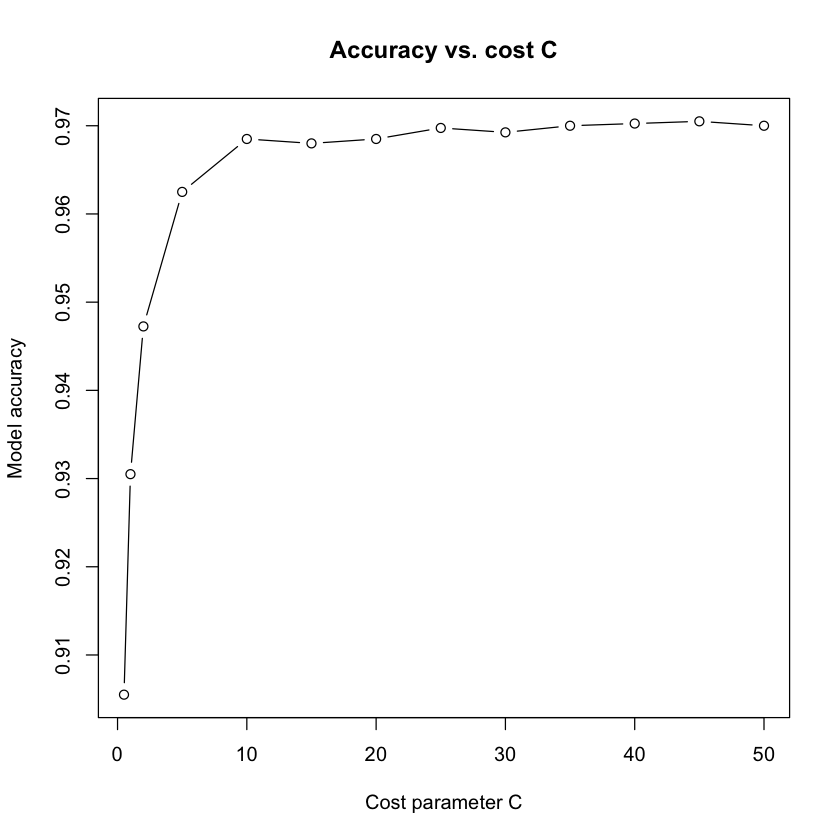

In [12]:
# Generate a sequence of cost values: 0.5, 1, 2, 5, 10, 15, ..., 50
cost_values <- c(0.5, 1, 2, seq(from = 5, to = 50, by = 5))

# Define and apply a custom function to "cost_values"
# This function (1) sets a seed; (2) generates a model for each value of C; (3) makes predictions; (4) computes and returns "accuracy"
accuracy_values <- sapply(cost_values, function(x) {
    set.seed(12345)
    svm_model <- ksvm(letter ~ ., data = letters_train, kernel = "rbfdot", C = x)
    svm_pred <- predict(svm_model, letters_test)
    svm_agree <- ifelse(svm_pred == letters_test$letter, 1, 0)
    accuracy <- sum(svm_agree) / nrow(letters_test)
    return(accuracy)
})

# Generate a plot of "accuracy versus cost"
plot(cost_values, accuracy_values, type = "b", xlab = "Cost parameter C", ylab = "Model accuracy", main = "Accuracy vs. cost C")

# Display the values
accuracy_values